In [95]:
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
def compute_graph_metrics(g):
    """
    Given a a graph, computes various statistics on the graph and return as a list

    Required parameters:
        g:
            - NetworkX graph
    """
    nodes = nx.number_of_nodes(g)

    #  Number of non-zero edges (i.e. binary edge count)
#     print("Computing: NNZ")
    nnz = len(nx.edges(g))
#     print(nnz)
    
    #  Degree sequence
#     print("Computing: Degree Sequence")
    total_deg = np.array(nx.degree(g))
#     ipso_deg = OrderedDict()
#     contra_deg = OrderedDict()
#     for subj in graphs:  # TODO GK: remove forloop and use comprehension maybe? <-- Just do this for a single graph.
#         g = graphs[subj]
    N = len(g.nodes())
    LLnodes = np.array(g.nodes())[0:int(N/2)]  # TODO GK: don't assume hemispheres <-- GA: Do we know that the first N/2 are the left?

    LL = g.subgraph(LLnodes)
    LLdegs = [LL.degree()[n] for n in LLnodes]

    RRnodes = np.array(g.nodes())[int(N/2):N]  # TODO GK: don't assume hemispheres <-- ""
    RR = g.subgraph(RRnodes)
    RRdegs = [RR.degree()[n] for n in RRnodes]

    LRnodes = g.nodes()
    ipso_list = LLdegs + RRdegs
    degs = [g.degree()[n] for n in LRnodes]
    contra_deg = [a_i - b_i for a_i, b_i in zip(degs, ipso_list)]
    ipso_deg = ipso_list

    deg = {'total_deg': total_deg,
           'ipso_deg': ipso_deg,
           'contra_deg': contra_deg}
#     print(deg)

    #  Edge Weights
#     print("Computing: Edge Weight Sequence")
#     temp_ew = [g.get_edge_data(e[0], e[1])['weight'] for e in g.edges()]
    temp_ew = [g.get_edge_data(e[0], e[1])['weight'] for e in g.edges()]
    ew = temp_ew
    ew = np.mean(ew)

    #   Clustering Coefficients
#     print("Computing: Clustering Coefficient Sequence")
    cc = nx.clustering(g).values()
    cc = np.mean(list(cc))

    # Scan Statistic-1
#     print("Computing: Max Local Statistic Sequence")
    ss1 = scan_statistic(g, 1)

    # Eigen Values
#     print("Computing: Eigen Value Sequence")
    laplac = nx.normalized_laplacian_matrix(g)
    eigs = np.sort(np.linalg.eigvals(laplac.A))[::-1]
#     print(laplac, eigs)

    # Betweenness Centrality
#     print("Computing: Betweenness Centrality Sequence")
    centrality = nx.algorithms.betweenness_centrality(g).values()
    centrality = np.mean(list(centrality))

    # Mean connectome (needs to be computed outside of loop)
#     print("Computing: Mean Connectome")
#     adj = OrderedDict((subj, nx.adj_matrix(g).todense())
#                       for subj in graphs)
#     mat = np.zeros(adj.values()[0].shape)
#     for subj in adj:
#         mat += adj[subj]
#     mat = mat/len(adj.keys())
#     write(outdir, 'study_mean_connectome', mat, atlas)
    mat = 0
#     return [nnz, deg, ew, cc, ss1, eigs, centrality, mat]
    return [nnz, ew, cc, ss1, centrality]


def show_means(data):
    print("Subject Means: " + ", ".join(["%.2f" % np.mean(data[key])
                                         for key in data.keys()]))


def scan_statistic(g, i):
    """
    Computes scan statistic-i on a single graph

    Required Parameters:
        g:
            - NetworkX graph
        i:
            - which scan statistic to compute
    """
    tmp = np.array(())
    for n in g.nodes():
        sg = nx.ego_graph(g, n, radius=i)
#         tmp = np.append(tmp, np.sum([sg.get_edge_data(e[0], e[1])['weight'] for e in sg.edges()]))
        tmp = np.append(tmp, np.sum([sg.get_edge_data(e[0], e[1])['weight'] for e in sg.edges()]))
#     return tmp
    return np.mean(tmp)


def write(outdir, metric, data, atlas):
    """
    Write computed derivative to disk in a pickle file

    Required parameters:
        outdir:
            - Path to derivative save location
        metric:
            - The value that was calculated
        data:
            - The results of this calculation
        atlas:
            - Name of atlas of interest as it appears in the directory titles
    """
    with open(outdir + '/' + atlas + '_' + metric + '.pkl', 'wb') as of:
        pickle.dump({metric: data}, of)

In [144]:
def write_metrics(inDir, outDir):
    # Create random barbell graph (could be any graph, just used barbell for testing)
    numiter = 20
    X = np.zeros((numiter, 5))
    for i in range(X.shape[0]):
        g = nx.barbell_graph(5, 7)
        # Assign random weights to edges
        for (u, v) in g.edges():
            g.edges[u,v]['weight'] = random.randint(0,10)
        # Compute metrics and store in a list
        vec = compute_graph_metrics(g)
        X[i] = vec
    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(X, linewidths=.5, ax=ax)
#     plt.show()
    ax.imshow(X, cmap="hot", interpolation="nearest")
    ax.set_xticks(np.arange(5))
    ax.set_yticks(np.arange(numiter))
    ax.set_title("NDMG Feature Matrix Heatmap")
    plt.ylabel("Iteration")
    plt.xlabel("Statistic")
    ax.set_xticklabels(["Number non-zero nodes", "Mean Edge Weight", "Clustering Coefficient", "Scan Statistic 1", "Betweenness Centrality"])
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()
    
    return X

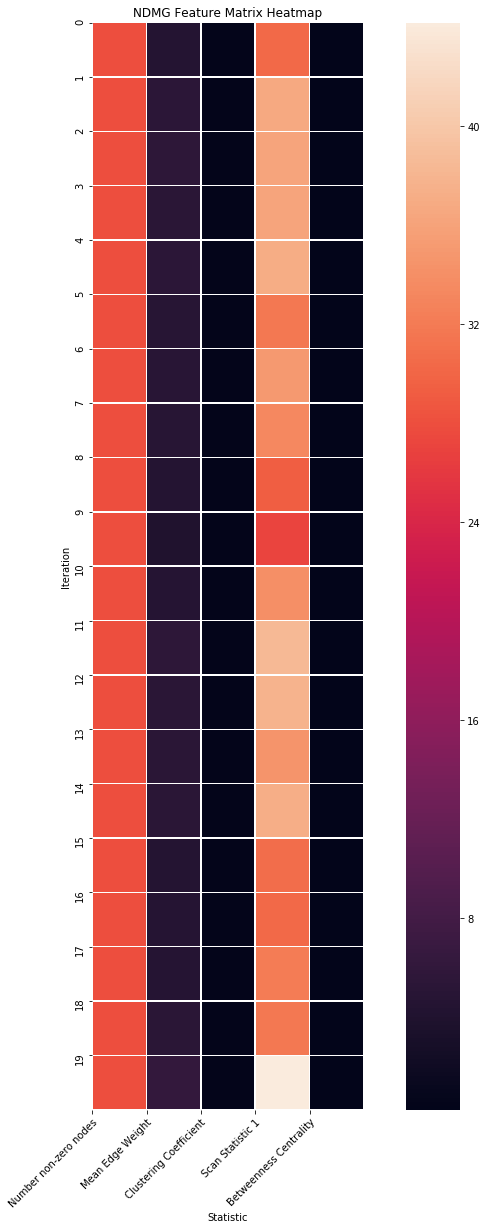

In [145]:
def main():
    write_metrics("", "")
    
if __name__ == "__main__": main()